# Question 1

In [65]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [66]:
image = cv2.imread('Lenna_(test_image).png',1)

In [67]:
cv2.namedWindow("Input")
cv2.imshow("Input",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
px=image[100,100]
print(px)

[ 78  68 178]


In [5]:
greyscaleimage = ((0.3*image[:,:,2])+(0.59*image[:,:,1])+(0.11*image[:,:,0])).astype('uint8')

In [6]:
np.shape(image)

(512, 512, 3)

In [7]:
np.shape(greyscaleimage)

(512, 512)

In [8]:
cv2.namedWindow("Input")
cv2.imshow("Input",greyscaleimage)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Question 2

In [9]:
import json

In [10]:
json_save_img = greyscaleimage.tolist()
json.dumps(json_save_img)
with open("file.json", "w") as outfile:
    json.dump(json_save_img, outfile)

# Question 3

In [21]:
def make_histogram(image,size):
    my_array = np.zeros(256)
    
    for i in range(size[0]):
        for j in range(size[1]):
            pixel_value = image[i][j]
            my_array[pixel_value] += 1
    return my_array            

In [13]:
image_path = 'einstein1.jpg'
einstien_jpg = cv2.imread(image_path,0)

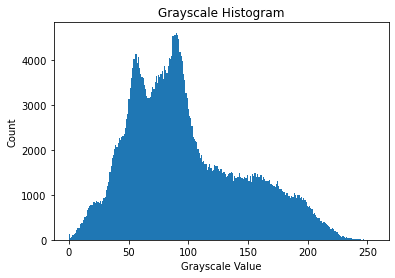

In [14]:
my_array = make_histogram(einstien_jpg,np.shape(einstien_jpg))
plt.hist(np.arange(256),bins=256, weights=my_array)
plt.xlabel('Grayscale Value')
plt.ylabel('Count')
plt.title('Grayscale Histogram')
plt.show()

In [15]:
np.shape(einstien_jpg)

(625, 640)

In [61]:
cv2.namedWindow("Input")
cv2.imshow("Input",einstien_jpg)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Question 4

In [32]:
def cumulative_sum(histogram):
    return np.cumsum(histogram)

In [49]:
def histogram_equalization(image):
    histogram = make_histogram(image, image.shape)
    cumulative = cumulative_sum(histogram)
    
    min_c = np.min(cumulative)
    max_c = np.max(cumulative)
    
    equalized = ((cumulative - min_c) * 255) / (max_c - min_c)
    
    return equalized

In [50]:
equalize = histogram_equalization(einstien_jpg)

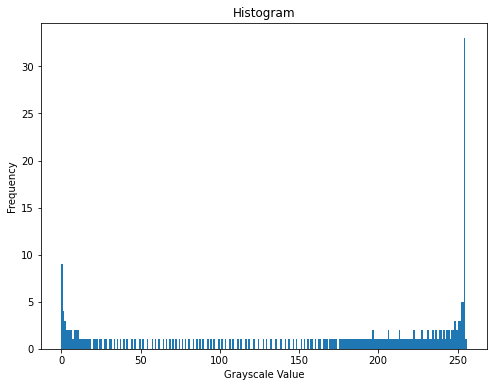

In [70]:
plt.figure(figsize=(8,6))
plt.hist(equalize.ravel(),256,[0, 256])
plt.xlabel('Grayscale Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


In [64]:
cv2.namedWindow("Einstien")
cv2.imshow("Einstien",equalize.astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()

# Question 5

In [53]:
q5_image = cv2.imread('Lenna_(test_image).png',1)

In [54]:
np.shape(q5_image)

(512, 512, 3)

In [55]:
resized_image = cv2.resize(q5_image, (16, 16))

In [56]:
kernel = np.array([[3,0,3],[1,0,1],[3,0,3]])

In [57]:
filtered_image = cv2.filter2D(resized_image, -1, kernel)

In [58]:
cv2.imshow('Image', filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
